In [3]:
import pandas as pd
import seaborn as sns
from numpy import load
import pickle
import numpy as np

In [4]:
df = pd.read_table( 
    '../../data/external/BERPublicSearch/BERPublicsearch.txt'
    ,usecols=[  'CountyName'
              , 'DwellingTypeDescr'
              , 'Year_of_Construction'
              , 'GroundFloorArea(sq m)'
              , 'EnergyRating'
              , 'TotalDeliveredEnergy'
              , 'InsulationType'
              , 'InsulationThickness'
              , 'MainSpaceHeatingFuel'
              , 'MainWaterHeatingFuel'
              , 'NoOfSidesSheltered'
              , 'StructureType'
              , 'VentilationMethod']
    ,encoding = 'Latin-1'
)

/var/folders/f2/h4nbcthd4cld5t6fzd1x3jg40000gn/T/ipykernel_5899/2474422705.py:1: DtypeWarning: Columns (71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(


In [5]:
df.head()

,CountyName,DwellingTypeDescr,Year_of_Construction,EnergyRating,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy
0,Co. Donegal,Detached house,1997,C2,171.19,Heating Oil,Heating Oil,Natural vent.,Masonry,1.0,Factory Insulated,20.0,25474.522
1,Co. Kildare,Detached house,2010,B3,242.93,Heating Oil,Heating Oil,Natural vent.,Masonry,2.0,Factory Insulated,50.0,27654.474
2,Co. Dublin,Semi-detached house,1999,C3,99.38,Mains Gas,Mains Gas,Natural vent.,Masonry,3.0,Loose Jacket,20.0,17000.038
3,Dublin 11,Semi-detached house,1965,C2,138.41,Mains Gas,Mains Gas,Natural vent.,Masonry,2.0,NaN,NaN,22708.484
4,Dublin 22,Semi-detached house,1985,D2,127.16,Mains Gas,Mains Gas,Natural vent.,Masonry,2.0,Loose Jacket,100.0,28182.863


In [6]:
df.isna().sum()

CountyName                    0
DwellingTypeDescr             0
Year_of_Construction          0
EnergyRating                  0
GroundFloorArea(sq m)         0
MainSpaceHeatingFuel      15648
MainWaterHeatingFuel      15648
VentilationMethod          3613
StructureType              3613
NoOfSidesSheltered         3613
InsulationType           232787
InsulationThickness      232787
TotalDeliveredEnergy     598110
dtype: int64

In [7]:
round(df.isna().mean() * 100, 2)

CountyName                0.00
DwellingTypeDescr         0.00
Year_of_Construction      0.00
EnergyRating              0.00
GroundFloorArea(sq m)     0.00
MainSpaceHeatingFuel      1.50
MainWaterHeatingFuel      1.50
VentilationMethod         0.35
StructureType             0.35
NoOfSidesSheltered        0.35
InsulationType           22.30
InsulationThickness      22.30
TotalDeliveredEnergy     57.30
dtype: float64

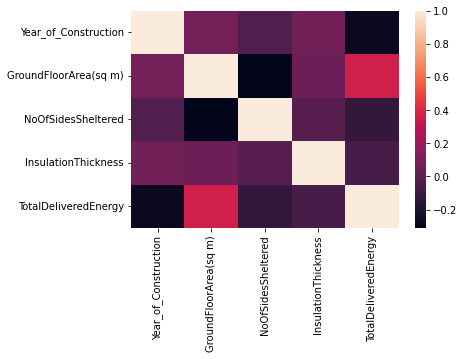

In [8]:
sns.heatmap(df.corr());

In [9]:
df.corr() < -0.7

,Year_of_Construction,GroundFloorArea(sq m),NoOfSidesSheltered,InsulationThickness,TotalDeliveredEnergy
Year_of_Construction,False,False,False,False,False
GroundFloorArea(sq m),False,False,False,False,False
NoOfSidesSheltered,False,False,False,False,False
InsulationThickness,False,False,False,False,False
TotalDeliveredEnergy,False,False,False,False,False


In [10]:
df_impute = pd.read_csv('../../data/processed/Define/seai_missingforest_data_imputed.csv')

In [11]:
df_impute

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyRating
0,Donegal,Detached house,1997,171.190,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,20.000000,25474.522000,C2
1,Kildare,Detached house,2010,242.930,Heating Oil,Heating Oil,Natural vent.,Masonry,two,Factory Insulated,50.000000,27654.474000,B3
2,Dublin,Semi-detached house,1999,99.380,Mains Gas,Mains Gas,Natural vent.,Masonry,three,Loose Jacket,20.000000,17000.038000,C3
3,Dublin,Semi-detached house,1965,138.410,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Factory Insulated,39.350000,22708.484000,C2
4,Dublin,Semi-detached house,1985,127.160,Mains Gas,Mains Gas,Natural vent.,Masonry,two,Loose Jacket,100.000000,28182.863000,D2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951816,Dublin,Mid-floor apartment,2020,37.797,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,four,Factory Insulated,32.030000,2279.816108,A3
951817,Dublin,Mid-floor apartment,2020,86.580,Electricity,Electricity,Bal.whole mech.vent heat recvr,Masonry,three,None,9.843333,5843.378697,A2
951818,Donegal,Detached house,1982,214.180,Heating Oil,Heating Oil,Natural vent.,Masonry,one,Factory Insulated,35.240000,52927.526000,D2
951819,Dublin,Mid-terrace house,1900,99.770,Manufactured Smokeless Fuel,Electricity,Natural vent.,Masonry,four,None,14.516667,40838.471060,G


In [12]:
X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')

In [13]:
X = np.concatenate((X_train, X_test), axis = 0)

In [14]:
y = np.concatenate((y_train, y_test), axis = 0)

In [15]:
y

array([10,  8, 12, ...,  5,  6,  9])

<AxesSubplot:>

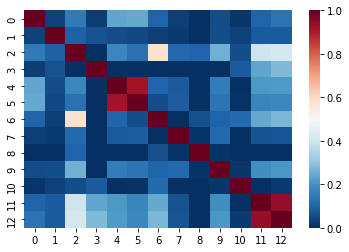

In [16]:
sns.heatmap(pd.DataFrame(X).corr(),robust=True, fmt="f", cmap='RdBu_r', vmin=0, vmax=1)

In [17]:
(pd.DataFrame(X).corr()) <= -0.8

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# Remove insulatiojn thickness and space heating from the mix for collinearity

In [19]:
(pd.DataFrame(X).corr())

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,0.033060,0.144796,0.023609,0.237896,0.245912,0.096492,0.028487,-0.081443,0.053048,0.013088,0.094021,0.129557
1,0.033060,1.000000,0.091424,0.066006,0.053854,0.049408,0.030509,0.021058,-0.036712,0.057756,0.031367,0.080722,0.081764
2,0.144796,0.091424,1.000000,-0.217998,0.174556,0.126650,0.579031,0.105992,0.100426,0.260877,0.055669,0.396889,0.413355
3,0.023609,0.066006,-0.217998,1.000000,-0.024950,-0.009421,-0.191966,-0.009214,-0.176819,-0.142590,0.078894,0.234692,0.280778
4,0.237896,0.053854,0.174556,-0.024950,1.000000,0.919317,0.100562,0.080314,-0.091419,0.151653,-0.001046,0.212896,0.215875
5,0.245912,0.049408,0.126650,-0.009421,0.919317,1.000000,0.057428,0.084994,-0.098634,0.136718,0.005943,0.171723,0.178248
6,0.096492,0.030509,0.579031,-0.191966,0.100562,0.057428,1.000000,-0.014543,0.062451,0.096815,0.112591,0.243609,0.270248
7,0.028487,0.021058,0.105992,-0.009214,0.080314,0.084994,-0.014543,1.000000,0.009730,0.105506,-0.017437,0.066194,0.070226
8,-0.081443,-0.036712,0.100426,-0.176819,-0.091419,-0.098634,0.062451,0.009730,1.000000,0.010317,-0.009500,-0.041412,-0.069062
9,0.053048,0.057756,0.260877,-0.142590,0.151653,0.136718,0.096815,0.105506,0.010317,1.000000,0.013053,0.192838,0.209147


In [20]:
df_impute.columns

Index(['CountyName', 'DwellingTypeDescr', 'YearofConstruction',
       'GroundFloorArea(sq m)', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel',
       'VentilationMethod', 'StructureType', 'NoOfSidesSheltered',
       'InsulationType', 'InsulationThickness', 'TotalDeliveredEnergy',
       'EnergyRating'],
      dtype='object')

In [21]:
X.shape

(1500140, 13)

In [22]:
y.shape

(1500140,)

In [23]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [24]:
X_df['13'] = y_df

In [25]:
df = X_df

In [26]:
df.columns = ['CountyName', 'DwellingTypeDescr', 'YearofConstruction',
       'GroundFloorArea(sq m)', 'MainSpaceHeatingFuel', 'MainWaterHeatingFuel',
       'VentilationMethod', 'StructureType', 'NoOfSidesSheltered',
       'InsulationType', 'InsulationThickness', 'TotalDeliveredEnergy', 'EnergyCost',
       'EnergyRating']

In [27]:
df

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyCost,EnergyRating
0,0.527829,0.460575,0.583704,0.034793,0.551164,0.557915,0.763902,0.528203,0.566693,0.559690,0.017949,0.008258,0.012306,10
1,0.527829,0.460575,0.583704,0.030000,0.645101,0.652729,0.880607,0.761415,0.715394,0.559690,0.013355,0.005829,0.008524,8
2,0.527829,0.460575,0.583704,0.071004,0.551164,0.557915,0.836329,0.672934,0.566693,0.749862,0.026709,0.020322,0.020300,12
3,0.672210,0.452223,0.583704,0.018248,0.609461,0.616757,0.938959,0.878022,0.658976,0.948794,0.013355,0.003990,0.005660,8
4,0.527829,0.710636,0.583704,0.016881,0.591641,0.598770,0.900722,0.801612,0.630768,0.546549,0.015344,0.007231,0.010707,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500135,0.511095,0.484134,0.629889,0.020728,0.586293,0.592063,0.798181,0.558503,0.623493,0.409133,0.000000,0.006084,0.008921,11
1500136,0.530392,0.493074,0.867344,0.023304,0.586293,0.592063,0.798181,0.558503,0.557095,0.621949,0.011298,0.009185,0.013749,14
1500137,0.582903,0.444990,0.204159,0.030161,0.586293,0.592063,0.798181,0.558503,0.557095,0.409133,0.013355,0.004383,0.006272,5
1500138,0.399306,0.444990,0.605161,0.024111,0.586293,0.592063,0.798181,0.558503,0.556222,0.923792,0.020032,0.003833,0.005416,6


In [28]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

boundaries = [-1.0, -0.8, -0.5, 0, 0.5, 0.8, 1.0]  # custom boundaries

# here I generated twice as many colors, 
# so that I could prune the boundaries more clearly
hex_colors = sns.light_palette('navy', n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]

colors=list(zip(boundaries, hex_colors))

custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)



<AxesSubplot:>

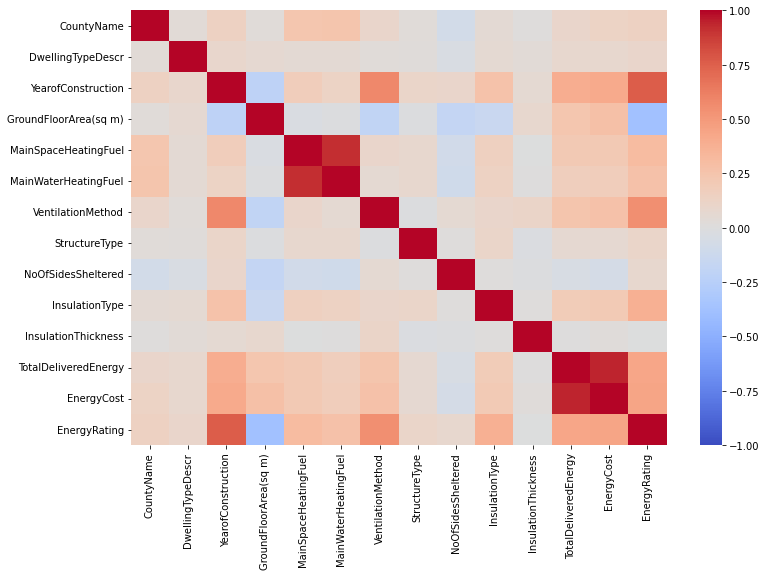

In [29]:
import matplotlib
matplotlib.pyplot.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm')

In [79]:
df.corr() 

,CountyName,DwellingTypeDescr,YearofConstruction,GroundFloorArea(sq m),MainSpaceHeatingFuel,MainWaterHeatingFuel,VentilationMethod,StructureType,NoOfSidesSheltered,InsulationType,InsulationThickness,TotalDeliveredEnergy,EnergyCost,EnergyRating
CountyName,1.000000,0.030185,0.148176,0.026774,0.232135,0.239889,0.096974,0.029647,-0.087726,0.053060,0.014612,0.099560,0.161978,0.147285
DwellingTypeDescr,0.030185,1.000000,0.092311,0.059421,0.052871,0.048007,0.032852,0.019077,-0.036644,0.061844,0.032461,0.082660,0.069592,0.101882
YearofConstruction,0.148176,0.092311,1.000000,-0.217303,0.178363,0.131586,0.578844,0.108586,0.104447,0.262777,0.054997,0.413567,0.371750,0.757735
GroundFloorArea(sq m),0.026774,0.059421,-0.217303,1.000000,-0.027067,-0.012429,-0.188020,-0.010676,-0.195370,-0.143898,0.081057,0.244277,0.300782,-0.377464
MainSpaceHeatingFuel,0.232135,0.052871,0.178363,-0.027067,1.000000,0.918293,0.105894,0.080605,-0.097803,0.152631,0.000198,0.224400,0.219456,0.314537
MainWaterHeatingFuel,0.239889,0.048007,0.131586,-0.012429,0.918293,1.000000,0.064273,0.085478,-0.104985,0.138509,0.007007,0.181912,0.200524,0.271393
VentilationMethod,0.096974,0.032852,0.578844,-0.188020,0.105894,0.064273,1.000000,-0.012297,0.064901,0.096816,0.113107,0.252569,0.249732,0.547690
StructureType,0.029647,0.019077,0.108586,-0.010676,0.080605,0.085478,-0.012297,1.000000,0.009797,0.105853,-0.017255,0.069769,0.073320,0.104981
NoOfSidesSheltered,-0.087726,-0.036644,0.104447,-0.195370,-0.097803,-0.104985,0.064901,0.009797,1.000000,0.013518,-0.010607,-0.050234,-0.107308,0.088789
InsulationType,0.053060,0.061844,0.262777,-0.143898,0.152631,0.138509,0.096816,0.105853,0.013518,1.000000,0.016019,0.201570,0.196089,0.377564


TotalDeliveredEnergy and EnergyCost are not independent events so its ok to leave them be

Interesting that year of construction has such a high correlation with energy rating although this is a fair assessment

In [31]:
df.EnergyRating.value_counts().sort_index()

0      97490
1     102095
2     103484
3      99237
4     101049
5     101952
6      97342
7      92745
8      92590
9      95841
10    100617
11    101710
12    102063
13    103328
14    108597
Name: EnergyRating, dtype: int64